In [1]:
import os
os.chdir('../')

os.getcwd()

'f:\\GraphCPP'

In [4]:
import pandas as pd
from pathlib import Path
import os 
import yaml


metrics = list()
df = None
for path in Path('lightning_logs').rglob('metrics.csv'):
    df = pd.read_csv(path)
    # fill the nan values with 0
    df = df.fillna(0)
    local_metrics = list()
    for index, row in df.iterrows():
        if row['val_mcc'] != 0.0:
            local_metrics.append((row['epoch'], row['val_accuracy'], row['val_mcc'], row['val_auc']))
    
    local_df = pd.DataFrame(local_metrics, columns=['epoch', 'val_accuracy', 'val_mcc', 'val_auc'])
    # sort by val_mcc
    local_df = local_df.sort_values(by=['val_mcc'], ascending=False)
    # take the first value and add it to the metrics
    # fix the error single positional indexer is out-of-bounds
    if local_df.shape[0] == 0:
        continue
    obj = {'val_mcc': local_df.iloc[0]['val_mcc']}

    # check if there is a hparams.yml file in the same directory
    hparams_path = os.path.join(path.parent, 'hparams.yaml')
    if os.path.exists(hparams_path):
        # read the hparams file and add the values to the metrics
        with open(hparams_path, 'r') as f:
            hparams = yaml.safe_load(f)
            obj.update(hparams)
    metrics.append(obj)
    
df = pd.DataFrame(metrics)
df.to_csv('metrics.csv', index=False)

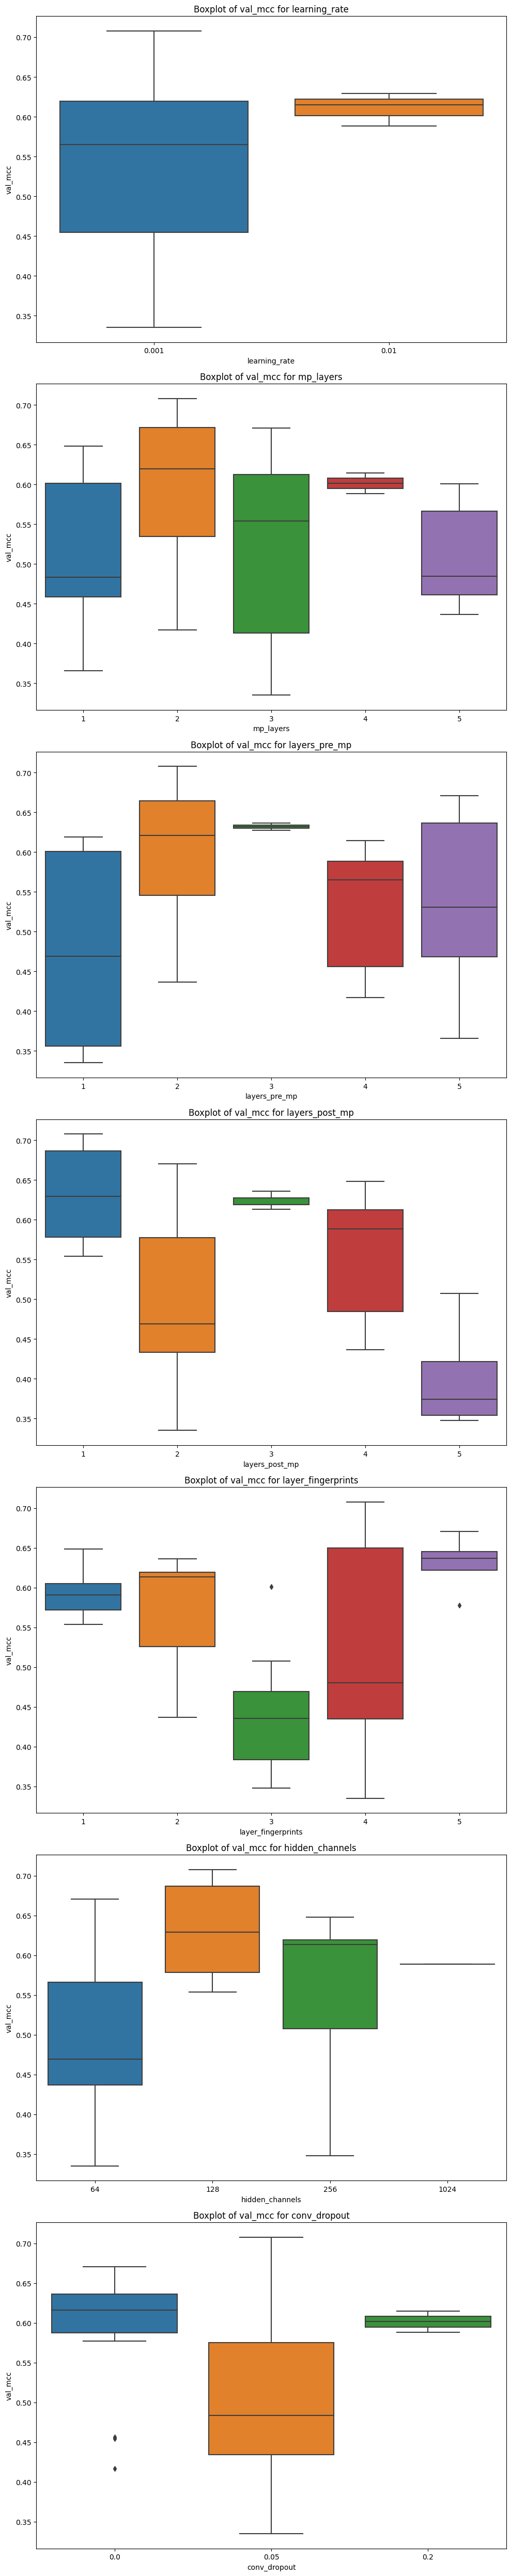

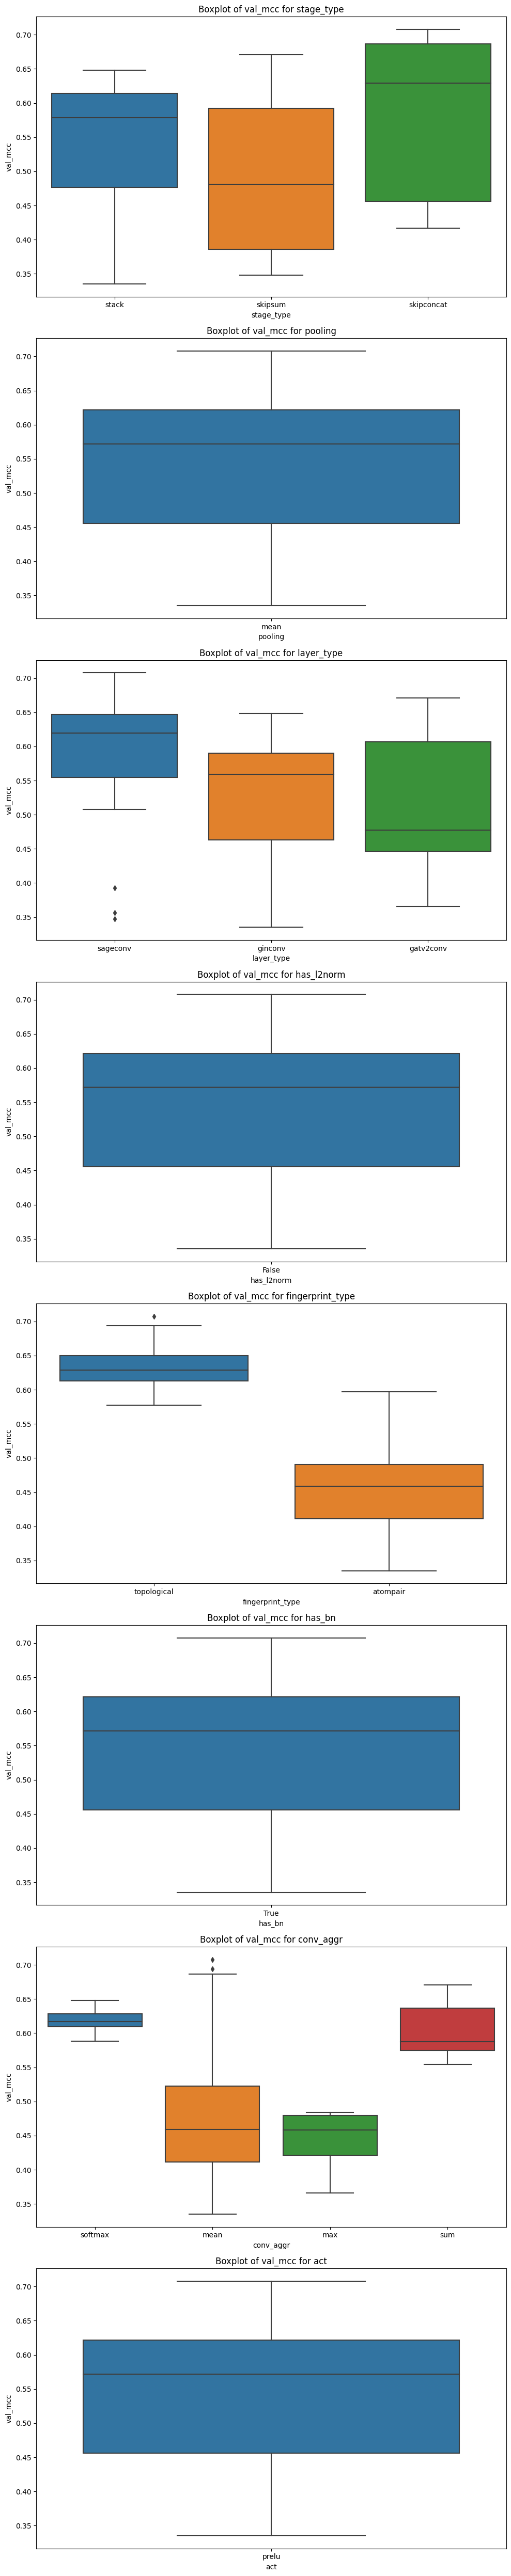

In [6]:
# Let's start by visualizing the boxplots for the numerical hyperparameters

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('metrics.csv')

numerical_cols = ['learning_rate', 'mp_layers', 'layers_pre_mp', 'layers_post_mp', 'layer_fingerprints', 'hidden_channels', 'conv_dropout']

fig, axs = plt.subplots(len(numerical_cols), figsize=(10, 50))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=col, y='val_mcc', data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of val_mcc for {col}')

plt.tight_layout()
plt.show()

#Here are the boxplots showing the distribution of val_mcc values for each numerical hyperparameter. Each boxplot provides a visual representation of the five-number summary of the val_mcc values: the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum. The "box" in the plot shows the interquartile range (from the first to the third quartile), and the line inside the box is the median. The "whiskers" show the range of the data within 1.5 times the interquartile range, and any points outside of this range are considered outliers and are plotted as individual points.

#Now, let's move on to the categorical hyperparameters.

# Now let's visualize the boxplots for the categorical hyperparameters

categorical_cols = ['stage_type', 'pooling', 'layer_type', 'has_l2norm', 'fingerprint_type', 'has_bn', 'conv_aggr', 'act']

fig, axs = plt.subplots(len(categorical_cols), figsize=(10, 50))

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='val_mcc', data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of val_mcc for {col}')

plt.tight_layout()
plt.show()
